In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/data.csv.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [ ]:
df.shape

(6362620, 10)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19384.72  M2044282225            0.00            0.00        0  
2                  0.00   C553264065            0.00            0.00        1  
3                  0.00    C38997010        21182.00            0.00        1  
4              29885.86  M1230701703            0.00            0.00        0  
...                 ...          ...             ...             ...      ...  
6362615            0.00   C776919290            0.00       339682.13        1  
6362616            0.00  C1881841831            0.00            0.00        1  
6362617            0.00  C1365125890        68488.84      6379898.11        1  
6362618            0.00  C2080388513            0.00            0.00        1  
6362619            0.00   C873221189      6510099.11      7360101.63        1  

[6362620 rows x 10 columns]>

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [ ]:
# Select only the numeric columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [ ]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 485.4+ MB


In [ ]:
le=LabelEncoder()
df['nameOrig']=le.fit_transform(df['nameOrig'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 485.4+ MB


In [ ]:
le=LabelEncoder()
df['nameDest']=le.fit_transform(df['nameDest'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(5)
memory usage: 485.4 MB


<Axes: >

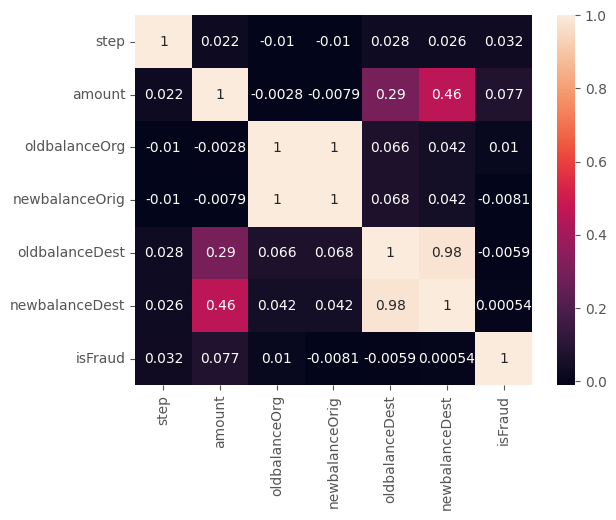

In [ ]:
sns.heatmap(numerical_df.corr(), annot=True)

<Axes: xlabel='step', ylabel='Count'>

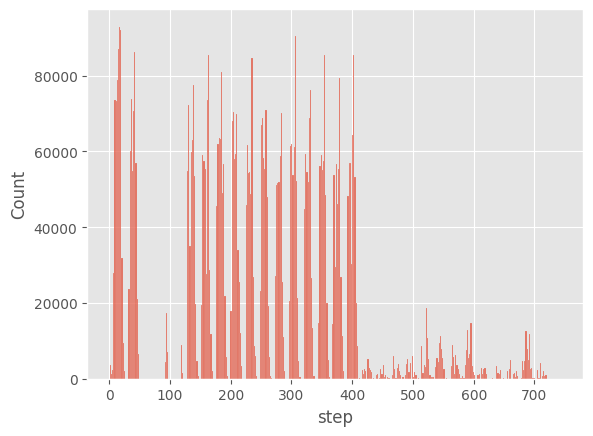

In [ ]:
# Step
sns.histplot(data=df, x='step')

<Axes: xlabel='amount', ylabel='Count'>

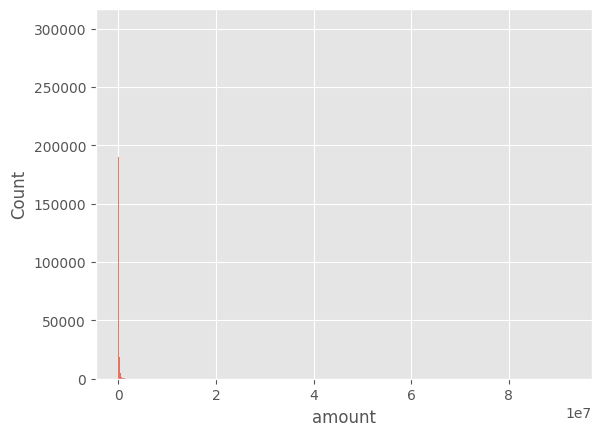

In [ ]:
# amount
sns.histplot(data=df, x='amount')

<Axes: xlabel='amount'>

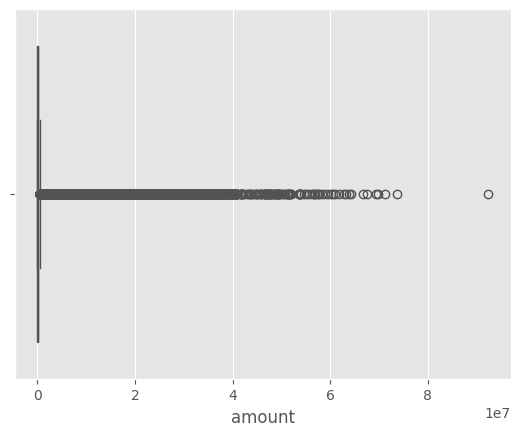

In [ ]:
# amount
sns.boxplot(data=df, x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

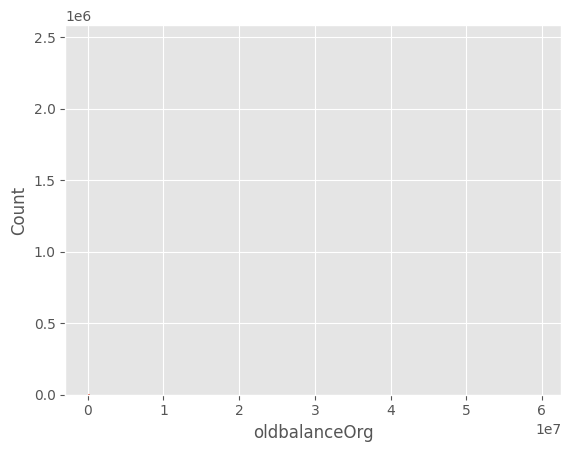

In [ ]:
# oldbalanceOrg
sns.histplot(data=df, x='oldbalanceOrg')

In [ ]:
# nameDest
df['nameDest'].value_counts()

nameDest
84652      113
567820     109
472721     105
320660     102
349730     101
          ... 
1095075      1
939730       1
1445164      1
1774945      1
319713       1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceOrg'>

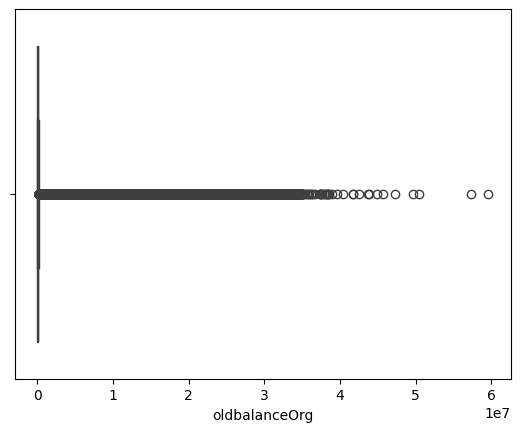

In [ ]:
# oldbalanceOrg
sns.boxplot(data=df, x='oldbalanceOrg')

<Axes: xlabel='newbalanceDest'>

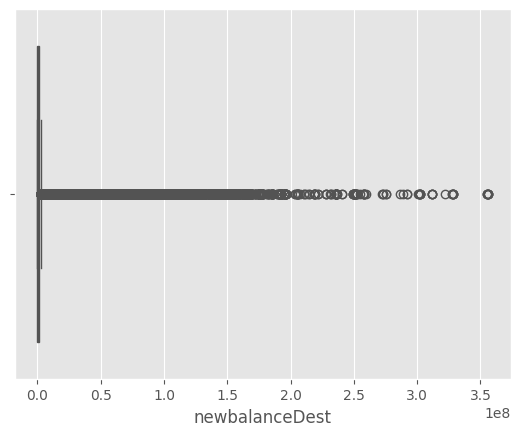

In [ ]:
 #newbalanceDest
sns.boxplot(data=df, x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

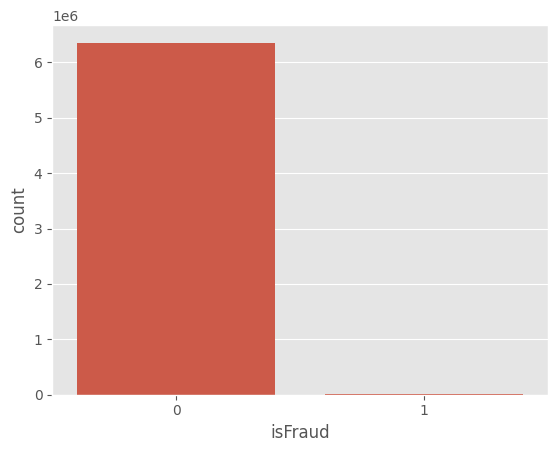

In [ ]:
# isFraud
sns.countplot(data=df, x='isFraud')

In [ ]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df.loc[df['isFraud'] == 0, "isFraud"] = "is not Fraud"
df.loc[df['isFraud'] == 1, "isFraud"] = "is Fraud"

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,is not Fraud
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,is not Fraud
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,is Fraud
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,is Fraud
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,is Fraud
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,is Fraud
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,is Fraud
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,is Fraud


In [ ]:
df.shape

(6362620, 10)

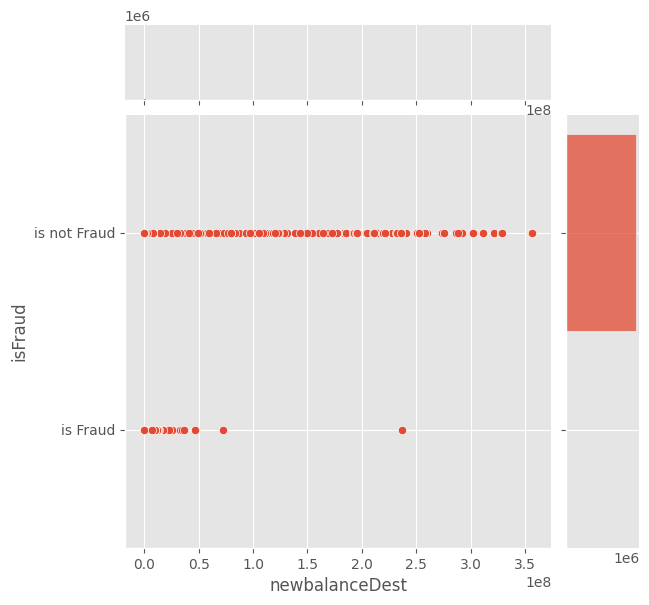

In [ ]:
sns.jointplot(data=df, x='newbalanceDest', y='isFraud')

<Axes: xlabel='type', ylabel='count'>

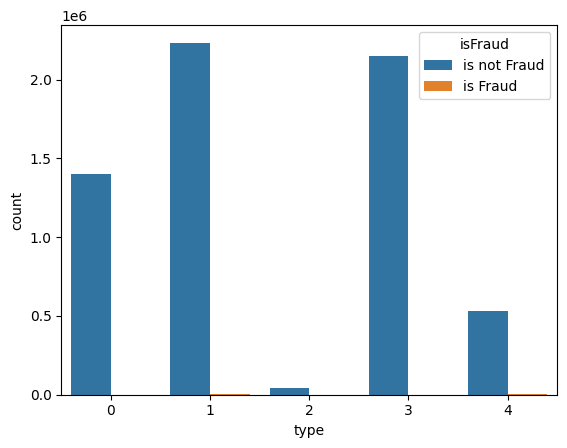

In [ ]:
sns.countplot(data=df, x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

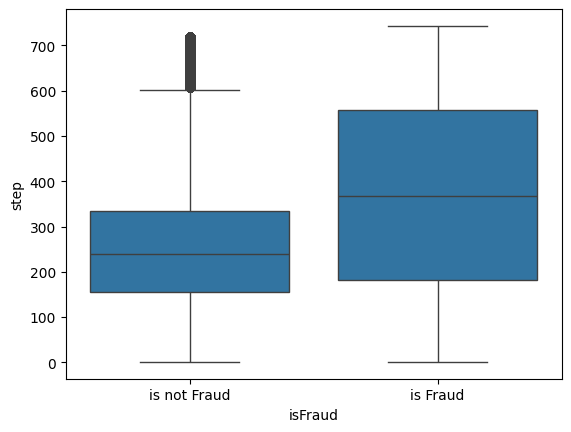

In [ ]:
sns.boxplot(data=df, x='isFraud',y='step')


<Axes: xlabel='isFraud', ylabel='amount'>

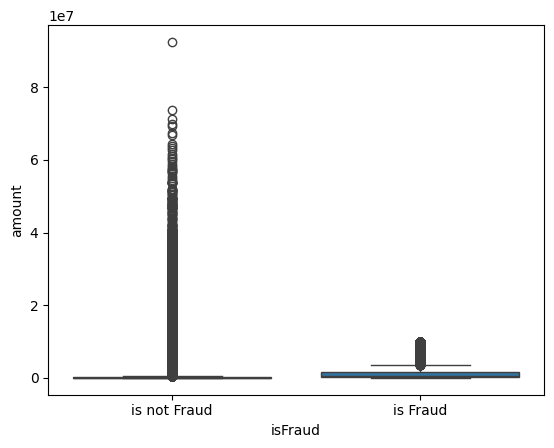

In [ ]:
sns.boxplot(data=df, x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

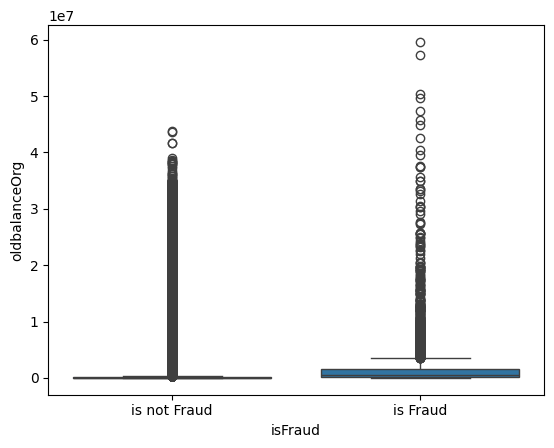

In [ ]:
sns.boxplot(data=df, x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

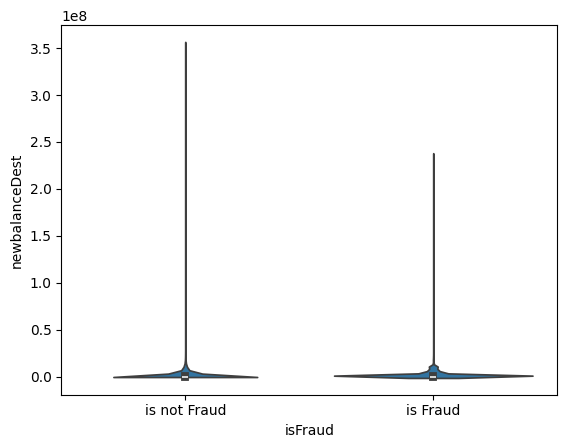

In [ ]:
sns.violinplot(data=df, x='isFraud',y='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

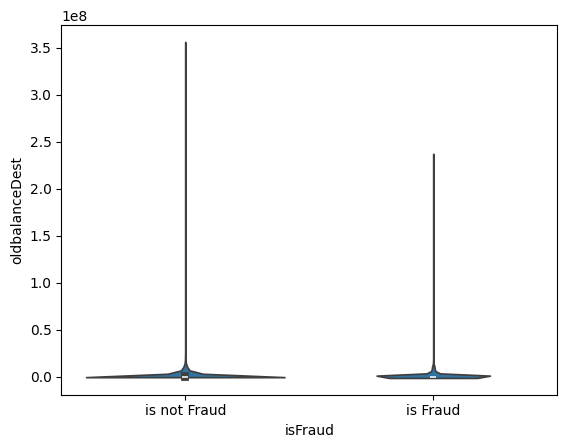

In [ ]:
sns.violinplot(data=df, x='isFraud',y='oldbalanceDest')

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,is not Fraud
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6354407
mean,2.433972e+02,1.714150e+00,1.798619e+05,3.176678e+06,8.338831e+05,8.551137e+05,7.464270e+05,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,1.350117e+00,6.038582e+05,1.834064e+06,2.888243e+06,2.924049e+06,7.502455e+05,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,1.000000e+00,1.338957e+04,1.588332e+06,0.000000e+00,0.000000e+00,2.168950e+05,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,1.000000e+00,7.487194e+04,3.176672e+06,1.420800e+04,0.000000e+00,4.322890e+05,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,3.000000e+00,2.087215e+05,4.765048e+06,1.073152e+05,1.442584e+05,1.132509e+06,9.430367e+05,1.111909e+06,NaN


<Axes: ylabel='amount'>

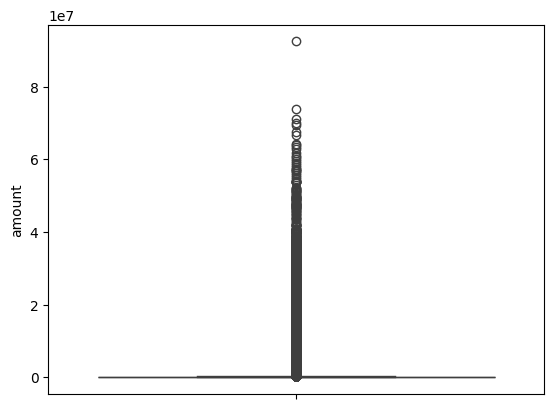

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))



ModeResult(mode=10000000.0, count=3207)
179861.90354913071


In [ ]:
q1=np.quantile(df['amount'],0.25)
q3=np.quantile(df['amount'],0.75)
IQR=q3-q1
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
print('q1:',q1)
print('upper_bound:',upper_limit)
print('lower_bound:',lower_limit)
print('iqr:',IQR)
print('skeweddata:',len(df[df['amount']>upper_limit]))
print('skeweddata:',len(df[df['amount']<lower_limit]))


q1: 13389.57
upper_bound: 501719.33875
lower_bound: -279608.29125
iqr: 195331.9075
skeweddata: 338078
skeweddata: 0


In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature[np.isfinite(feature)])
  plt.subplot(1,2,2)
  stats.probplot(feature[np.isfinite(feature)],plot=plt)


In [ ]:
positive_amounts=df['amount'][df['amount']>0]
#negative_amounts=df[df['amount']<0]

<ipython-input-31-694416fc9e96>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature[np.isfinite(feature)])


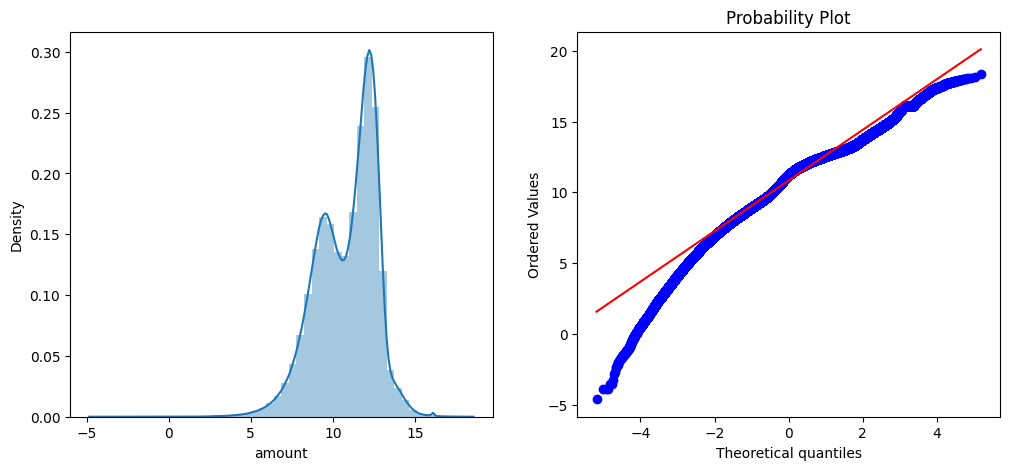

In [ ]:
transformationplot(np.log(positive_amounts))

In [ ]:
df['amount']=np.log(df['amount'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [ ]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [ ]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']


In [ ]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9.194174,757869,170136.00,160296.36,1662094,0.00,0.00
1,1,3,7.530630,2188998,21249.00,19384.72,1733924,0.00,0.00
2,1,4,5.198497,1002156,181.00,0.00,439685,0.00,0.00
3,1,1,5.198497,5828262,181.00,0.00,391696,21182.00,0.00
4,1,3,9.364617,3445981,41554.00,29885.86,828919,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6362615,743,1,12.735766,5651847,339682.13,0.00,505863,0.00,339682.13
6362616,743,4,15.657870,1737278,6311409.28,0.00,260949,0.00,0.00
6362617,743,1,15.657870,533958,6311409.28,0.00,108224,68488.84,6379898.11
6362618,743,4,13.652995,2252932,850002.52,0.00,319713,0.00,0.00


In [ ]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
6362615        is Fraud
6362616        is Fraud
6362617        is Fraud
6362618        is Fraud
6362619        is Fraud
Name: isFraud, Length: 6362620, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 9)
(1272524, 9)
(5090096,)
(1272524,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_test_pred1 = rf.predict(x_test)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_test_pred1=rf.predict(x_test)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
test_acurracy=accuracy_score(y_test,y_test_pred1)
print(test_acurracy)

0.9997108109552354


In [ ]:
y_train_pred1=rf.predict(x_train)
train_acurracy=accuracy_score(y_train,y_train_pred1)
print(train_acurracy)

In [ ]:
pd.crosstab(y_test,y_test_pred1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1296,345
is not Fraud,23,1270860


In [ ]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

    is Fraud       0.98      0.79      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_test_pred2=dt.predict(x_test)

In [ ]:
test_acurracy=accuracy_score(y_test,y_test_pred2)
print(test_acurracy)

0.9996715189654576


In [ ]:
y_train_pred2=dt.predict(x_train)
train_acurracy=accuracy_score(y_train,y_train_pred2)
print(train_acurracy)

1.0


In [ ]:
pd.crosstab(y_test,y_test_pred2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1430,211
is not Fraud,207,1270676


In [ ]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

    is Fraud       0.87      0.87      0.87      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_test_pred3=etc.predict(x_test)
test_acurracy=accuracy_score(y_test,y_test_pred3)
print(test_acurracy)

0.9996565880093421


In [ ]:
y_train_pred3=etc.predict(x_train)
train_acurracy=accuracy_score(y_train,y_train_pred3)
print(train_acurracy)

1.0


In [ ]:
pd.crosstab(y_test,y_test_pred3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1207,434
is not Fraud,3,1270880


In [ ]:
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.74      0.85      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       1.00      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit label encoder on training data and transform labels
y_train1=le.fit_transform(y_train)


In [ ]:
y_test1=le.transform(y_test)
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train , y_train1)
y_test_pred4 = xgb1.predict(x_test)

In [ ]:
# prompt: save xgboost with pickle

# Save the trained XGBoost model to a file
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb1, model_file)

print("XGBoost model saved successfully.")


XGBoost model saved successfully.


In [ ]:
test_acurracy=accuracy_score(y_test1,y_test_pred4)
print(test_acurracy)

0.9997705347796977


In [ ]:
y_train_pred4=xgb1.predict(x_train)
train_acurracy=accuracy_score(y_train1,y_train_pred4)
print(train_acurracy)

0.9998668001546532


In [ ]:
pd.crosstab(y_test1,y_test_pred4)

col_0,0,1
row_0,,
0,1399,242
1,50,1270833


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_pred4))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1641
           1       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.98      0.93      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import pickle

# Save the model to a file
with open('dt.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
import pickle
pickle.dump(dt,open('dt.pkl','wb'))

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download('dt.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('dt.pkl', 'wb') as model_file:
     pickle.dump(dt,model_file)

In [ ]:
import pickle
with open('dt.pkl', 'rb') as model_file:
    lm = pickle.load(model_file)